## **04. Exploratory Data Analysis (EDA)**

---
Memahami Struktur Data




## Import Library

In [25]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from nltk.tokenize import sent_tokenize

Loading Data

In [26]:
data = pd.read_csv(
    '../03. Integrasi Data (Data Integration)/Dataset_Integration2.csv', 
    sep="\t"
)

In [27]:
data

,tweet,label
0,pengabdian yang terpuji meskipun terlihat biasa,Neutral
1,baru saja mengirim foto,Neutral
2,apa kabar dunia twitter ? masihkah selucu dan seabsurd dulu ?,Neutral
3,yah gimana sih yang yaudah susul aku dulu kita sarapan bubur di tempat biasa,Neutral
4,saja ka dorg suro beli medium 2 set,Neutral
...,...,...
46765,@winniethewins Bisa cod atau shopee ka?,Neutral
46766,Wts / want to sell INA lfb Bornpink blackpink 2 pocket photo card holder 40.000 Bisa shopee bisa keep event (dp) bisa cod bisa live shopee Condi ? Bisa dm ya Jakarta Tag. wts cahol blackpink #ตลาดนัดblackpink #pasarblackpink,Neutral
46767,ลองดู [COD] Flash Sale 1กิโล แมคคายกกระสอบ ตุ๊กกี้ตัวแสบ ในราคา ฿49 - ฿299 ที่ Shopee https://t.co/fqnr74iD5g https://t.co/8BxglcP9HR,Joy
46768,Yang suka gayaCek OLEVS Jam Tangan Pria Anti Air Original Rantai Keren Terbaru Mewah Luxury Stainless Steel Watch Men Cod Jam Tangan Lelaki Couple Watch Model 9931 dengan harga Rp284.000. Dapatkan di Shopee sekarang! https://t.co/JbDCGSODb7 https://t.co/bPBNQagq4A,Neutral


## A. Data Structure

In [28]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46770 entries, 0 to 46769
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   46770 non-null  object
 1   label   46770 non-null  object
dtypes: object(2)
memory usage: 730.9+ KB
None


## B. Label Proportion

### 1. Explain Label

In [29]:
# Check if 'label' column exists in the DataFrame
if 'label' in data.columns:
    print(data['label'].value_counts())
else:
    print("The 'label' column does not exist in the DataFrame.")


label
Neutral    12298
Joy         9894
Anger       8979
Fear        6622
Sad         5064
Love        3913
Name: count, dtype: int64


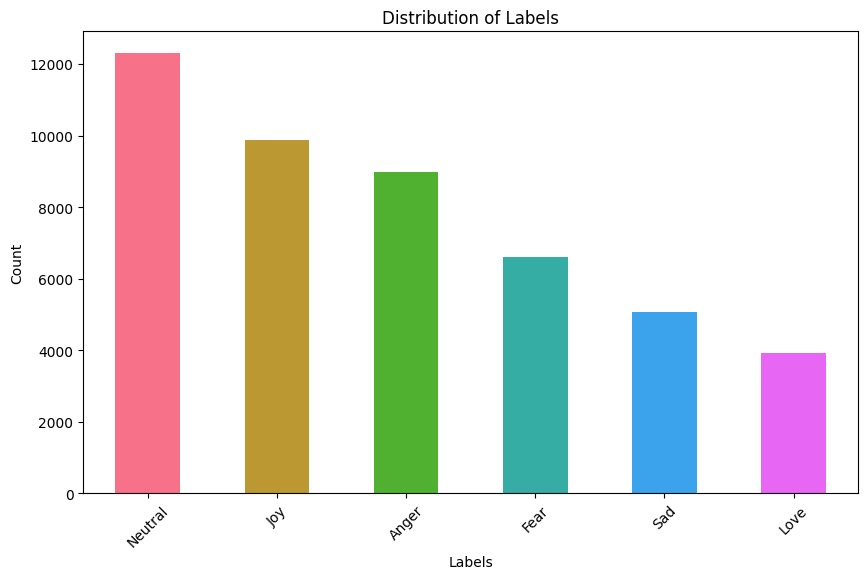

In [30]:
label_counts = data["label"].value_counts()

# Generate a color palette with a unique color for each label
palette = sns.color_palette("husl", len(label_counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=palette)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### 2. Label Head

In [31]:
pd.set_option('display.max_colwidth', None)

#### a. Neutral

In [32]:
label = data[data['label'] == 'Neutral']

total = label.shape[0]
print(f"Jumlah baris : {total}")
label.head(10)

Jumlah baris : 12298


,tweet,label
0,pengabdian yang terpuji meskipun terlihat biasa,Neutral
1,baru saja mengirim foto,Neutral
2,apa kabar dunia twitter ? masihkah selucu dan seabsurd dulu ?,Neutral
3,yah gimana sih yang yaudah susul aku dulu kita sarapan bubur di tempat biasa,Neutral
4,saja ka dorg suro beli medium 2 set,Neutral
5,"ayo cek koleksinya, temukan angry draken yang unik nftindonesiamendunia _merketplace : skin normal: 0.003 eth",Neutral
6,kalau gitu biasa biasa aja dah gua.,Neutral
7,"dalam tiap-tiap twit, tak melulu perlu ada pesan moral. kadang yg kita perlukan hanya tersenyum membaca twit lucu tanpa arti, utk memulai hari yg bahagia.",Neutral
8,"halo v, apa kabar nih",Neutral
9,"pagi ruby, apa kabar?",Neutral


#### b. Joy

In [33]:
label = data[data['label'] == 'Joy']

total = label.shape[0]
print(f"Jumlah baris : {total}")
label.head(10)

Jumlah baris : 9894


,tweet,label
5009,dipeluk enak nih,Joy
5010,masih dongg wkkwkwtar klo gk semangat gk bisa bucinin bebep2 aku,Joy
5011,semangat dan bertambah kuatlah kalian frp_natsud_ frp_lucyheart frp_wendy ~,Joy
5012,jangan lupa sarapann semangat buat hari inii ayang semoga harimu menyenangkan !!,Joy
5013,aw ikut seneng semangat ya kuliahnya!,Joy
5014,semangat!!,Joy
5015,senang bermain salju,Joy
5016,"nikmati, bisa senang-senang bareng teman tapi tetap produktif,",Joy
5017,"akhirnya syuting lagii, semangat ayank",Joy
5018,"kalau yg cuma kembang tahu doang, aku belum pernah coba tapi pasti enak.,duh lupa namanya",Joy


#### c. Anger

In [34]:
label = data[data['label'] == 'Anger']

total = label.shape[0]
print(f"Jumlah baris : {total}")
label.head(10)

Jumlah baris : 8979


,tweet,label
1992,pagi2 udah di buat emosi :),Anger
1993,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh..",Anger
1994,dah lah emosi mulu liat emyu,Anger
1995,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya",Anger
1996,dih lu yg nyebelin bego,Anger
1997,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol",Anger
1998,drama abg tolol,Anger
1999,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,Anger
2000,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya",Anger
2001,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,Anger


#### d. Sad

In [35]:
label = data[data['label'] == 'Sad']

total = label.shape[0]
print(f"Jumlah baris : {total}")
label.head(10)

Jumlah baris : 5064


,tweet,label
3113,"akibat dari telat bangun, anak ikut bangun dan dapur dan rumah tidak kepegang sampe jam segini. sedih karena berantakan, tp gppa dehh penting anak dah mandi dan kenyang dulu. alon-alon asal kelakon",Sad
3114,sedih dah,Sad
3115,"sedih emg kalo ditinggal temen ngebucin, sedih ga ada waktu main sm temen, sedih krna pengen ngebucin jg",Sad
3116,sedih bener niih club ya,Sad
3117,"sch! soalnya di sekolah ku (jateng) kekurangan guru bangett,,banyak guru yg bukan bidangnya justru ngajar di bidang tsb,dan bahkan kepseknya juga rangkap sama sekolah lain. kl emg ini bener sedih banget,gimana generasi kedepannya :(",Sad
3118,kok saya tetap sedih ya,Sad
3119,ya allah aku sedih kali sumpah denise hsgsfscs dari awal aku udh bad feeling tapi masih berharap gitulo paham kan,Sad
3120,gk bs gmbr biar folls/ moots mengerti dan tdk kecewa dgn diriku yang tak bisa gmbr tp maksa sok gmbr,Sad
3121,"semoga kamu tak perlu mengenal sedih ku, semoga kau mengenal ku, yang hanya ku, dengan segala baik dan buruk ku..",Sad
3122,dih sepi amat,Sad


#### e. Fear

In [36]:
label = data[data['label'] == 'Fear']

total = label.shape[0]
print(f"Jumlah baris : {total}")
label.head(10)

Jumlah baris : 6622


,tweet,label
4104,trs barusan dia reach out aku trs minta tolong buat bantu project dia yaallaah aaaa jujur agak takut pressure tp ok gapapa,Fear
4105,"sumpah ini receh bgt dan not bts related. cm jujur w magang padet bgt dikasih project mayan banyak. trs kemaren ada senior gd presentasi gt dan keeren2 bgt nangis parah. trs aku pengen chat blio pengen tanya2. minta nomornya ke hrd, dapet, tp mau chat gajadi soalnya takut",Fear
4106,ragu utk bisa beli barang tu karn harganya bisa buat cicilan bulanan,Fear
4107,bisa gak sih langsung tanggal 11 aja gausah ada tanggal 10 gua takut banget mana 2 hari lagi,Fear
4108,iya kaan yg lain suka pada coba pd gpp tp tetep takut wkwk,Fear
4109,eh sumpah gw takut bangett. serem bangett itu orang,Fear
4110,"namnjim lag like like nya ngeri bgt, anak buah imam jumbo emg sama aja semuanya",Fear
4111,ogeb bat dah pake sok sok an kaget,Fear
4112,"plis nilai akm keluarnya lama banget, takut",Fear
4113,"mau ikut esd aja telat, trus takut flop",Fear


#### f. Love

In [37]:
label = data[data['label'] == 'Love']

total = label.shape[0]
print(f"Jumlah baris : {total}")
label.head(10)

Jumlah baris : 3913


,tweet,label
6264,"suka banget kata2, ""kebenaran hanya menurut selera kalian saja.""",Love
6265,"hanse mode anak rumahan gini tuh aku suka banget wkwk pake kaos terus bawahnya celana model apapun itu, misal jeans atau training tuh fav banget sih. atau pake kemeja.. sebenernya apapun style nya suka aja sih",Love
6266,"ya kali ngejar ngejar cinta, ngejar tahajjud aja kadang suka telat",Love
6267,"selamat pagi sender! sana avail nih pas hari valentine, nanti disayang-sayang sama sana, dia orangnya manja dan suka manjain balik terus juga suka usel-usel sama pacarnya. aku drop carrd sana ya kalau kalau tertari langsung ketuk dm aku ya!",Love
6268,sopaa!! cuz akuu suka banget jurusan tari di sana aku sering ngikutin daily school nya anak sopaa dan itu asik asik bangett mereka juga suka ada event!!,Love
6269,btw roo makasih rekomendasinyaa suka banget sama ini au beneran dah tt aku sampe sakit perut ketawa mulu,Love
6270,"awalnya mas firman suka masak ini karena suka nonton masterchef australia season 2 pada 2010, nah mulai dari situlah benih-benih cinta terhadap masakan mulai muncul. untuk chef favorit atau panutannya sendiri ada gordon ramsey, sebastian fitarau dan marion grasby.",Love
6271,heh crush sya ko lucu banget ya pengen jujur deh sama muhammad kenzie rafael bahwa sya suka sma diaa,Love
6272,"ya udah, enggak apa. gue sama sahabat gue di sma pernah suka sama laki yang sama. kita bawa fun aja, inget banget waktu tuh laki lagi main futsal di lapangan sekolah, siapa yang liat duluan, nanti kasih tau terus nonton bareng.",Love
6273,"iya bangett suka minderan, kalo nemenin temen yg suka nya cuma liat2 aja kadang suka malu banget",Love


## C. Character Analysis Tweet

### 1. Karakter

In [38]:
data['Length'] = data['tweet'].str.len()
data

,tweet,label,Length
0,pengabdian yang terpuji meskipun terlihat biasa,Neutral,47
1,baru saja mengirim foto,Neutral,23
2,apa kabar dunia twitter ? masihkah selucu dan seabsurd dulu ?,Neutral,61
3,yah gimana sih yang yaudah susul aku dulu kita sarapan bubur di tempat biasa,Neutral,76
4,saja ka dorg suro beli medium 2 set,Neutral,35
...,...,...,...
46765,@winniethewins Bisa cod atau shopee ka?,Neutral,39
46766,Wts / want to sell INA lfb Bornpink blackpink 2 pocket photo card holder 40.000 Bisa shopee bisa keep event (dp) bisa cod bisa live shopee Condi ? Bisa dm ya Jakarta Tag. wts cahol blackpink #ตลาดนัดblackpink #pasarblackpink,Neutral,224
46767,ลองดู [COD] Flash Sale 1กิโล แมคคายกกระสอบ ตุ๊กกี้ตัวแสบ ในราคา ฿49 - ฿299 ที่ Shopee https://t.co/fqnr74iD5g https://t.co/8BxglcP9HR,Joy,133
46768,Yang suka gayaCek OLEVS Jam Tangan Pria Anti Air Original Rantai Keren Terbaru Mewah Luxury Stainless Steel Watch Men Cod Jam Tangan Lelaki Couple Watch Model 9931 dengan harga Rp284.000. Dapatkan di Shopee sekarang! https://t.co/JbDCGSODb7 https://t.co/bPBNQagq4A,Neutral,264


In [39]:
print(f"Jumlah karakter tweet  : {data['Length'].sum():.2f}")
print(f"Rata-rata panjang karakter tweet : {data['Length'].mean():.2f}")

Jumlah karakter tweet  : 7070242.00
Rata-rata panjang karakter tweet : 151.17


### 2. Kata

In [40]:
# Define the word count function
def word_count(tweet):
    tweet_list = tweet.split()
    return len(tweet_list)

# Apply the word count function to the 'tweet' column
data['Word_count'] = data['tweet'].apply(word_count)


In [41]:
# Drop rows where Word_count is greater than 30
#data = data[data['Word_count'] <= 35]

In [42]:
# Print jumlah kata and rata-rata jumlah kata
print(f"Jumlah kata : {data['Word_count'].sum():.2f}")
print(f"Rata-rata jumlah kata : {data['Word_count'].mean():.2f}")



Jumlah kata : 1017933.00
Rata-rata jumlah kata : 21.76


In [43]:
data

,tweet,label,Length,Word_count
0,pengabdian yang terpuji meskipun terlihat biasa,Neutral,47,6
1,baru saja mengirim foto,Neutral,23,4
2,apa kabar dunia twitter ? masihkah selucu dan seabsurd dulu ?,Neutral,61,11
3,yah gimana sih yang yaudah susul aku dulu kita sarapan bubur di tempat biasa,Neutral,76,14
4,saja ka dorg suro beli medium 2 set,Neutral,35,8
...,...,...,...,...
46765,@winniethewins Bisa cod atau shopee ka?,Neutral,39,6
46766,Wts / want to sell INA lfb Bornpink blackpink 2 pocket photo card holder 40.000 Bisa shopee bisa keep event (dp) bisa cod bisa live shopee Condi ? Bisa dm ya Jakarta Tag. wts cahol blackpink #ตลาดนัดblackpink #pasarblackpink,Neutral,224,38
46767,ลองดู [COD] Flash Sale 1กิโล แมคคายกกระสอบ ตุ๊กกี้ตัวแสบ ในราคา ฿49 - ฿299 ที่ Shopee https://t.co/fqnr74iD5g https://t.co/8BxglcP9HR,Joy,133,15
46768,Yang suka gayaCek OLEVS Jam Tangan Pria Anti Air Original Rantai Keren Terbaru Mewah Luxury Stainless Steel Watch Men Cod Jam Tangan Lelaki Couple Watch Model 9931 dengan harga Rp284.000. Dapatkan di Shopee sekarang! https://t.co/JbDCGSODb7 https://t.co/bPBNQagq4A,Neutral,264,36


## D. Wordcloud

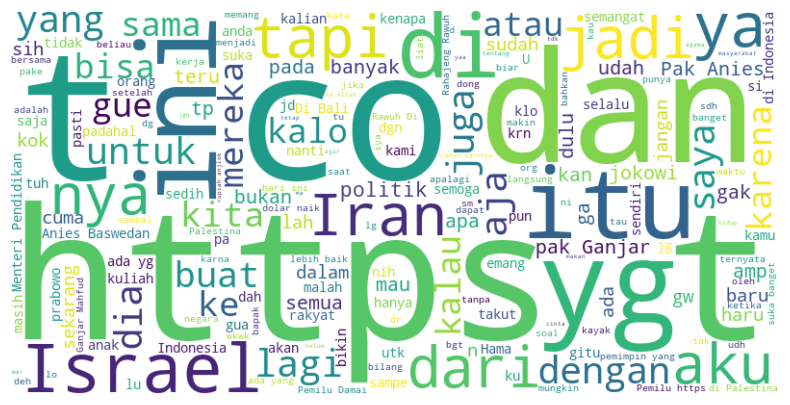

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dalam satu string
all_tweets = ' '.join(data['tweet'])

# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
